In [36]:
%matplotlib inline  

In [13]:
import pyspark_cassandra
from pyspark.sql import SQLContext
sql = SQLContext(sc)

In [4]:
tab = sc.cassandraTable("labor", "average_price_data_current")

In [17]:
apd = tab.toDF(sampleRatio=.1)

In [19]:
# looking at the price of peaches
peaches = apd[apd.item == "711414"]

In [32]:
peaches_per_location = peaches.select("area_name").groupBy("area_name").count()

In [37]:
ppl = peaches_per_location.toPandas()

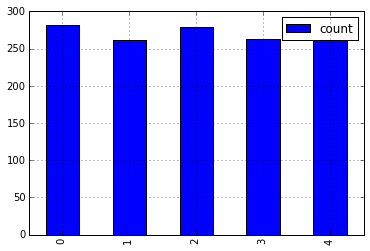

In [38]:
ppl.plot(kind="bar")